In [53]:
import os 
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('/home/melissa/PROJECT_DIRECTORIES/GRIN2B/scripts')
%run plotting.py

# Palette Color Variations

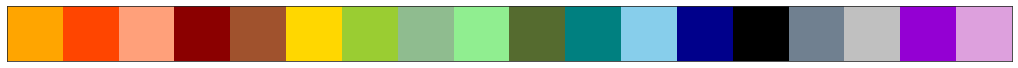

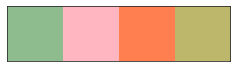

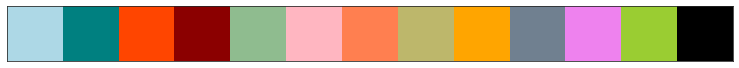

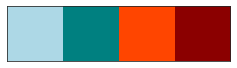

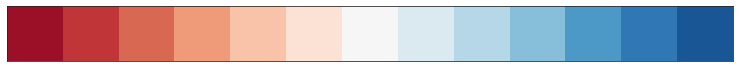

In [54]:
wt_id_colors = ['orange', 'orangered','lightsalmon','darkred','sienna', 'gold','yellowgreen','darkseagreen','lightgreen','darkolivegreen',
         'teal', 'skyblue', 'darkblue','black', 'slategrey', 'silver', 'darkviolet', 'plum']
sns.palplot(wt_id_colors)
royal = ['darkseagreen', 'lightpink', 'coral', 'darkkhaki']
darjeeling = ['orange', 'lightgreen', 'skyblue', 'plum']
bright = ['lightblue', 'teal', 'orangered', 'darkred']
channels = ['lightblue', 'teal', 'orangered', 'darkred', 'darkseagreen', 
                 'lightpink', 'coral', 'darkkhaki', 'orange', 'slategrey', 'violet', 'yellowgreen', 'black']
sns.palplot(royal)
sns.palplot(channels[0:13])
sns.palplot(bright)
diverging_colors = sns.color_palette("RdBu", 13)
sns.palplot(diverging_colors)

colors_dict= {0 : 'teal', 2 :'orangered', 3 : 'orangered', 4: 'orangered', 5: 'darkred',
              6 : 'darkred', 7 : 'teal', 8: 'darkred', 9:'darkred', 10: 'teal',
              11: 'orangered', 12: 'orangered', 13: 'orangered', 15 : 'teal'}

# IDs for sleepstages excluding seizure epochs

In [55]:
GRIN_wt_IDs = ['378','382', '383', '401','402','404', '430','140','132',
               '238','240','362','363','365','366','369','371','375']
len(GRIN_wt_IDs)

18

In [56]:
GRIN_het_IDs = ['131', '130', '129', '228', '227', '229', '373', '138', '137',
                '139','236', '237', '239', '241', '364', '367', '368', '424',
                '433']
len(GRIN_het_IDs)

19

In [57]:
br_animal_IDs = ['378', '382', '383', '401', '402', '404','424', '430','433',
                '140', '129', '130', '131', '132', '137','138', '139', '227',
                '228', '229', '236', '237', '238', '239', '240', '241', '362',
                '363', '364', '365', '366', '367', '368', '369', '371', '373', '375'] 
len(br_animal_IDs)

37

In [58]:
wt_list_to_plot = []

for id in range(0, len(GRIN_wt_IDs)-1, 2):
    wt_list_to_plot.append([int(GRIN_wt_IDs[id]), int(GRIN_wt_IDs[id + 1])])

In [60]:
het_list_to_plot = []

for id in range(0, len(GRIN_het_IDs)-1, 2):
    het_list_to_plot.append([int(GRIN_het_IDs[id]), int(GRIN_het_IDs[id + 1])])

In [61]:
os.chdir('/home/melissa/RESULTS/GRIN2B/Power/NREM')
nrem = pd.read_csv('NREM_filtered_data_old_algo.csv')
#os.chdir('/home/melissa/RESULTS/GRIN2B/Power/NREM/')        
#non_rem = pd.read_csv('baseline_nonREM_power.csv')

In [40]:
nrem[nrem['Channel'] == 3]

,Unnamed: 0,Animal_ID,Channel,Power,Frequency
10642,0,366,3,1.060549e+02,0.000000
10643,1,366,3,4.846718e+02,0.200160
10644,2,366,3,5.105206e+02,0.400320
10645,3,366,3,4.272587e+02,0.600480
10646,4,366,3,5.151722e+02,0.800639
...,...,...,...,...,...
299223,621,140,3,1.011916e-11,124.200000
299224,622,140,3,9.996146e-12,124.400000
299225,623,140,3,9.900770e-12,124.600000
299226,624,140,3,9.832802e-12,124.800000


In [21]:
channel_int = []
for value in nrem['Channel']:
    channel_int.append(int(value))

In [22]:
nrem = nrem.drop('Channel', axis = 1)

In [23]:
nrem['Channel'] = channel_int

In [24]:
nrem

,Unnamed: 0,Animal_ID,Power,Frequency,Genotype,Channel
0,0,401,4.353620e+01,0.0,WT,6
1,1,401,2.271053e+02,0.2,WT,6
2,2,401,2.955317e+02,0.4,WT,6
3,3,401,2.230290e+02,0.6,WT,6
4,4,401,1.552054e+02,0.8,WT,6
...,...,...,...,...,...,...
301101,621,130,1.320601e-12,124.2,GRIN2B,2
301102,622,130,1.312010e-12,124.4,GRIN2B,2
301103,623,130,1.305341e-12,124.6,GRIN2B,2
301104,624,130,1.300592e-12,124.8,GRIN2B,2


In [38]:
plot_list = ['somatosensory', 'motor', 'visual']
label_list = [0,1, 2]

for plot, label in zip(plot_list, label_list):
    print(plot_list[label])

somatosensory
motor
visual


In [37]:
#save_path = '/home/melissa/RESULTS/GRIN2B/Power/REM/IDX/'
#plot_by_channel_region(rem, sleepstage = 'REM', save_path = save_path)

[131, 130]
[129, 228]


KeyboardInterrupt: 

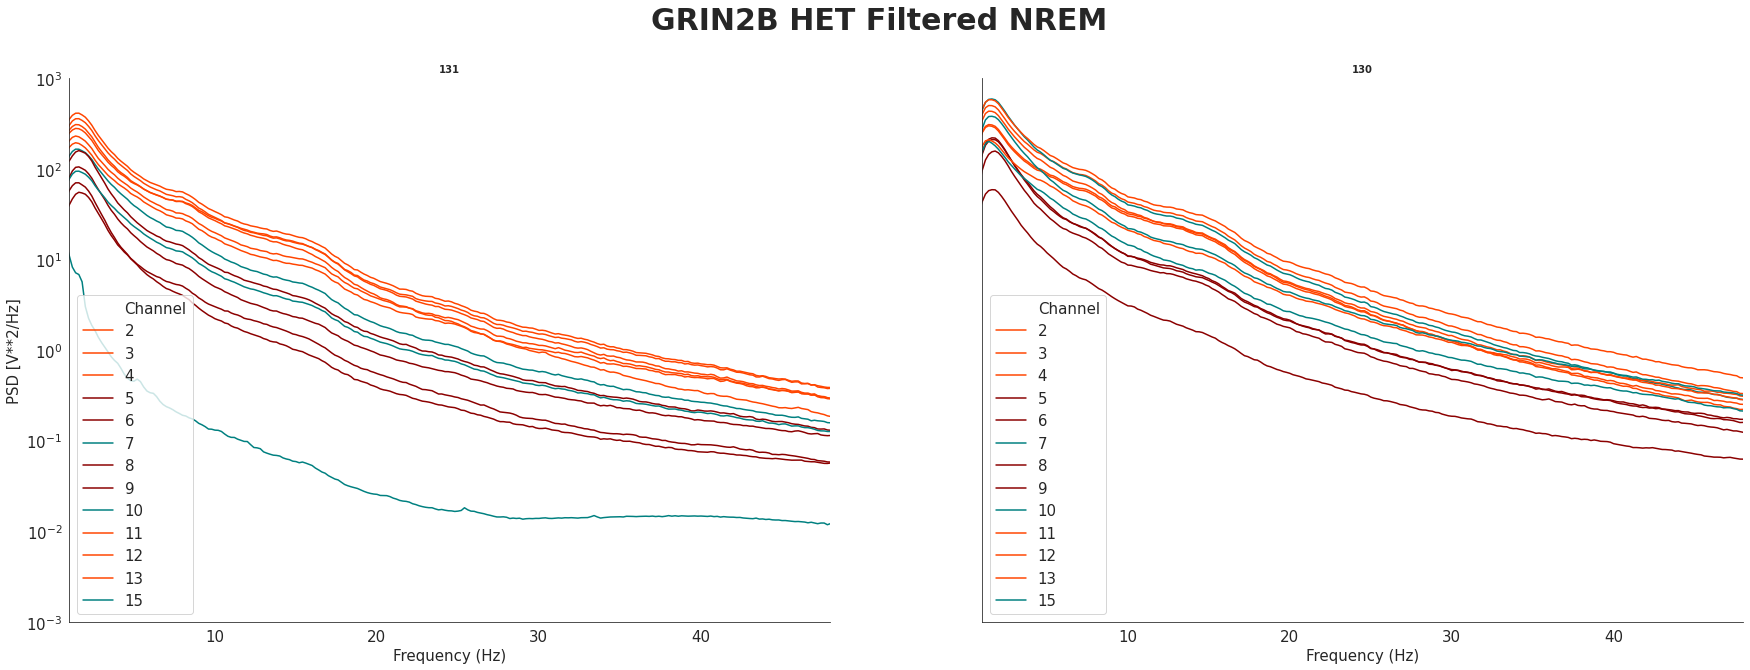

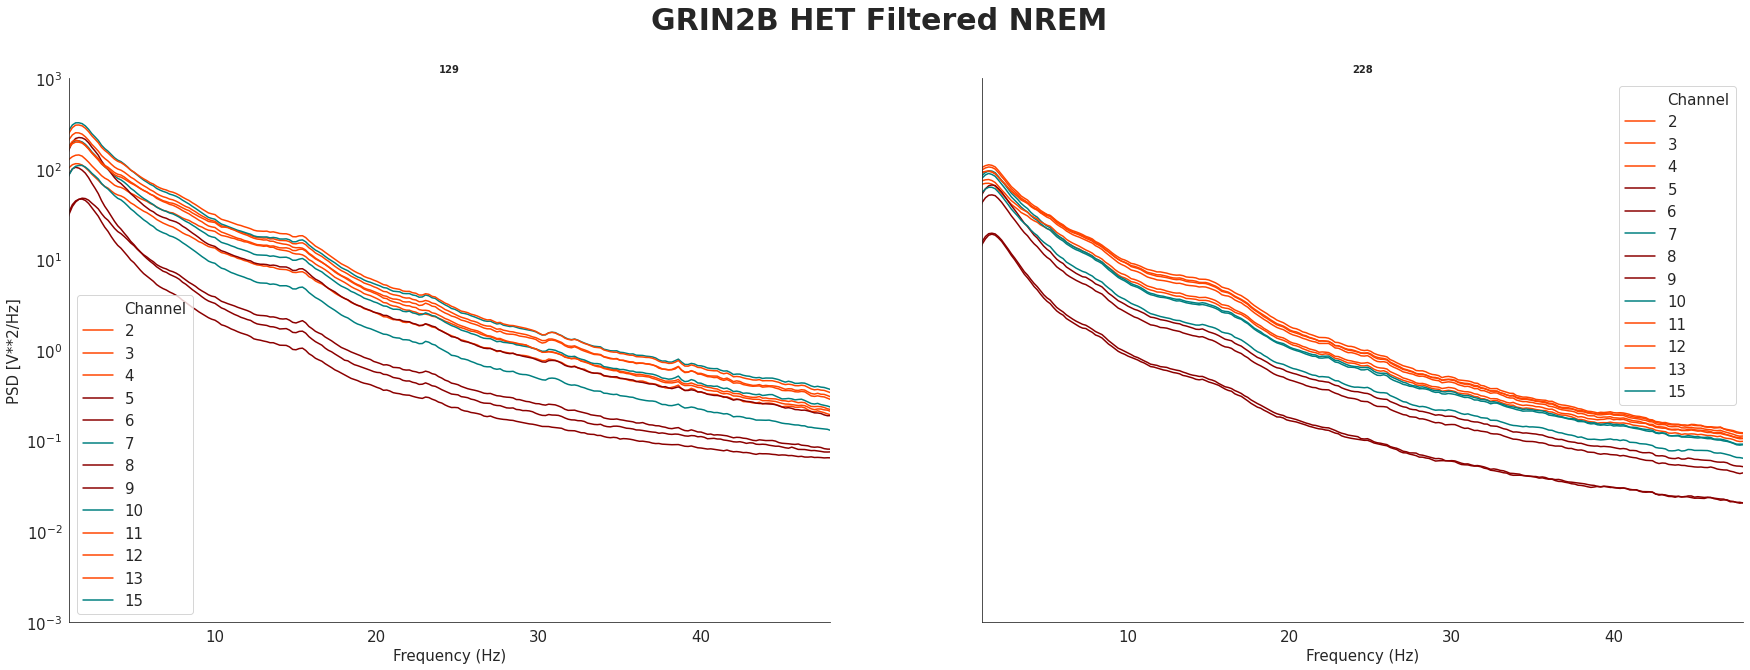

In [62]:
save_path = '/home/melissa/RESULTS/GRIN2B/Power/NREM'
plot_animals = PlottingGRIN2B()
plot_animals.plot_by_animal(nrem, genotype = 'GRIN2B HET Filtered', sleepstage = 'NREM', save_path = save_path, plots_list = het_list_to_plot, plotting_palette = colors_dict )

# Separate by genotypes 

In [46]:
Genotype = []
for anim_id in nrem['Animal_ID']:
    anim_id = str(anim_id)
    if anim_id in GRIN_het_IDs:
        Genotype.append('GRIN2B')
    elif anim_id in GRIN_wt_IDs:
        Genotype.append('WT')

In [47]:
nrem['Genotype'] = Genotype

In [48]:
channel_list_plot = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15]

        Unnamed: 0  Animal_ID  Channel         Power  Frequency Genotype
27544            0        138        2  1.313940e+02        0.0   GRIN2B
27545            1        138        2  4.447063e+02        0.2   GRIN2B
27546            2        138        2  3.192091e+02        0.4   GRIN2B
27547            3        138        2  2.736495e+02        0.6   GRIN2B
27548            4        138        2  3.437203e+02        0.8   GRIN2B
...            ...        ...      ...           ...        ...      ...
301101         621        130        2  1.320601e-12      124.2   GRIN2B
301102         622        130        2  1.312010e-12      124.4   GRIN2B
301103         623        130        2  1.305341e-12      124.6   GRIN2B
301104         624        130        2  1.300592e-12      124.8   GRIN2B
301105         625        130        2  1.297746e-12      125.0   GRIN2B

[23162 rows x 6 columns]


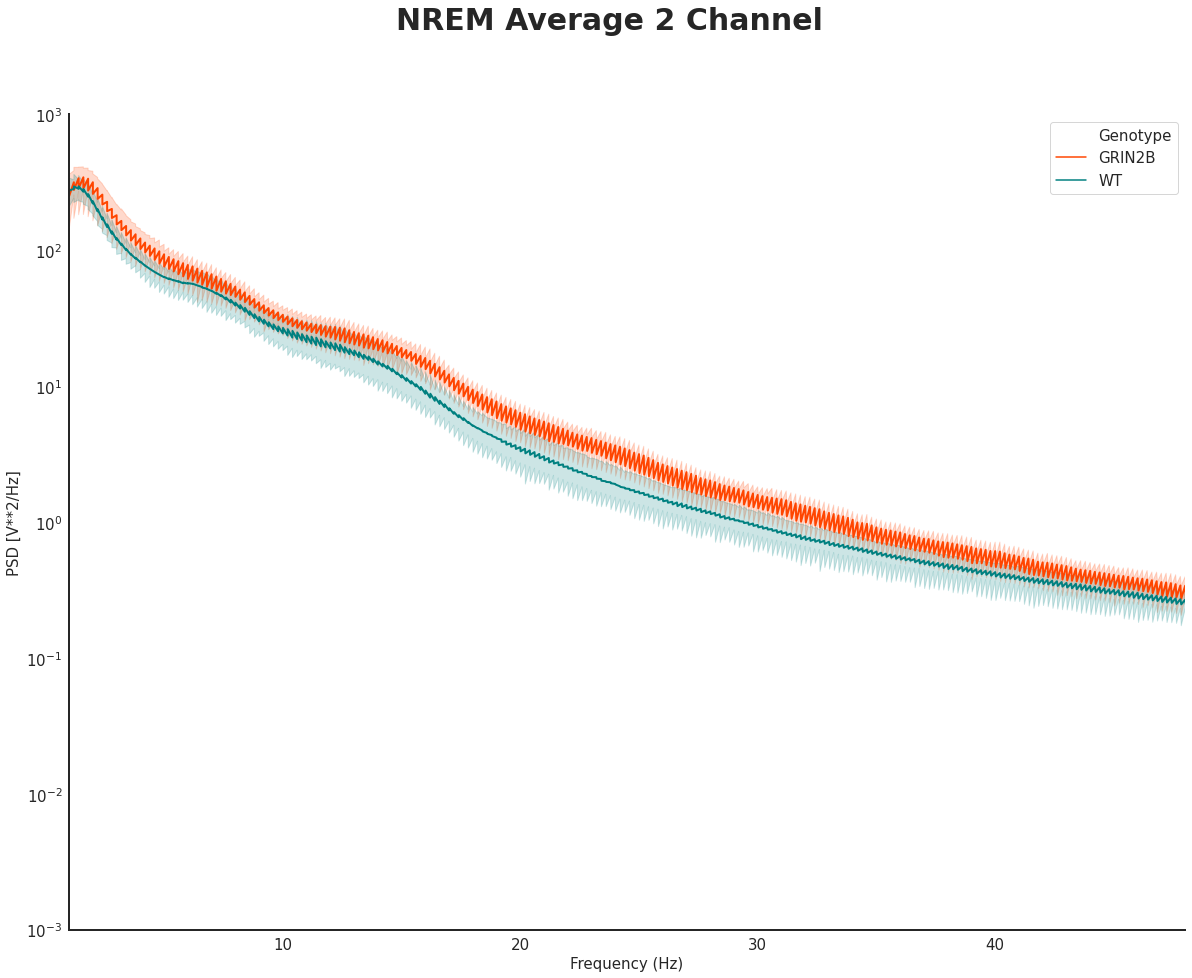

        Unnamed: 0  Animal_ID  Channel         Power   Frequency Genotype
10642            0        366        3  1.060549e+02    0.000000       WT
10643            1        366        3  4.846718e+02    0.200160       WT
10644            2        366        3  5.105206e+02    0.400320       WT
10645            3        366        3  4.272587e+02    0.600480       WT
10646            4        366        3  5.151722e+02    0.800639       WT
...            ...        ...      ...           ...         ...      ...
299223         621        140        3  1.011916e-11  124.200000       WT
299224         622        140        3  9.996146e-12  124.400000       WT
299225         623        140        3  9.900770e-12  124.600000       WT
299226         624        140        3  9.832802e-12  124.800000       WT
299227         625        140        3  9.792084e-12  125.000000       WT

[23162 rows x 6 columns]


<Figure size 432x288 with 0 Axes>

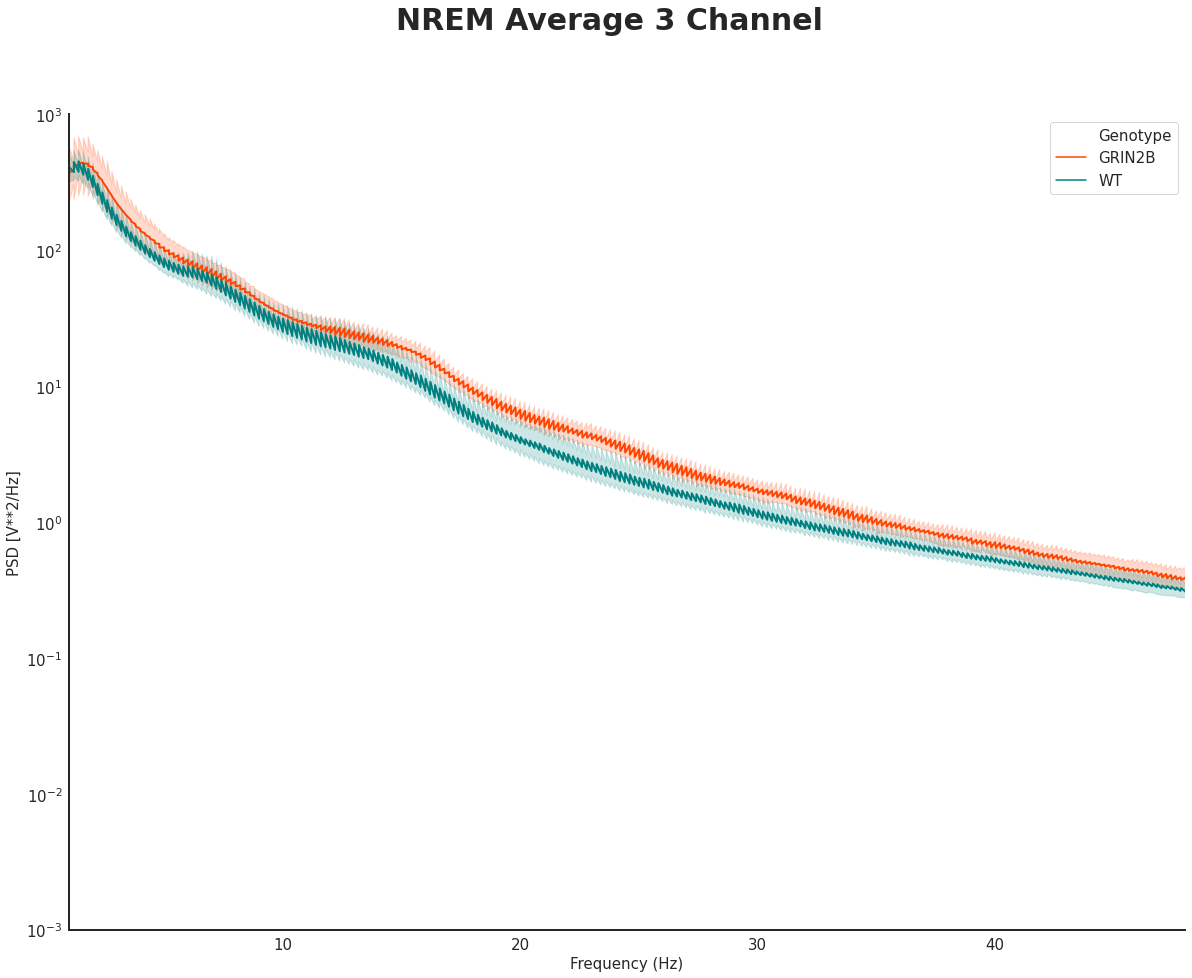

        Unnamed: 0  Animal_ID  Channel         Power   Frequency Genotype
1878             0        402        4  2.777501e+01    0.000000       WT
1879             1        402        4  1.295802e+02    0.200160       WT
1880             2        402        4  1.644646e+02    0.400320       WT
1881             3        402        4  1.873657e+02    0.600480       WT
1882             4        402        4  2.105106e+02    0.800639       WT
...            ...        ...      ...           ...         ...      ...
296093         621        366        4  2.777544e-11  124.299281       WT
296094         622        366        4  2.749781e-11  124.499440       WT
296095         623        366        4  2.728293e-11  124.699600       WT
296096         624        366        4  2.713000e-11  124.899760       WT
296097         625        366        4  2.703848e-11  125.099920       WT

[23162 rows x 6 columns]


<Figure size 432x288 with 0 Axes>

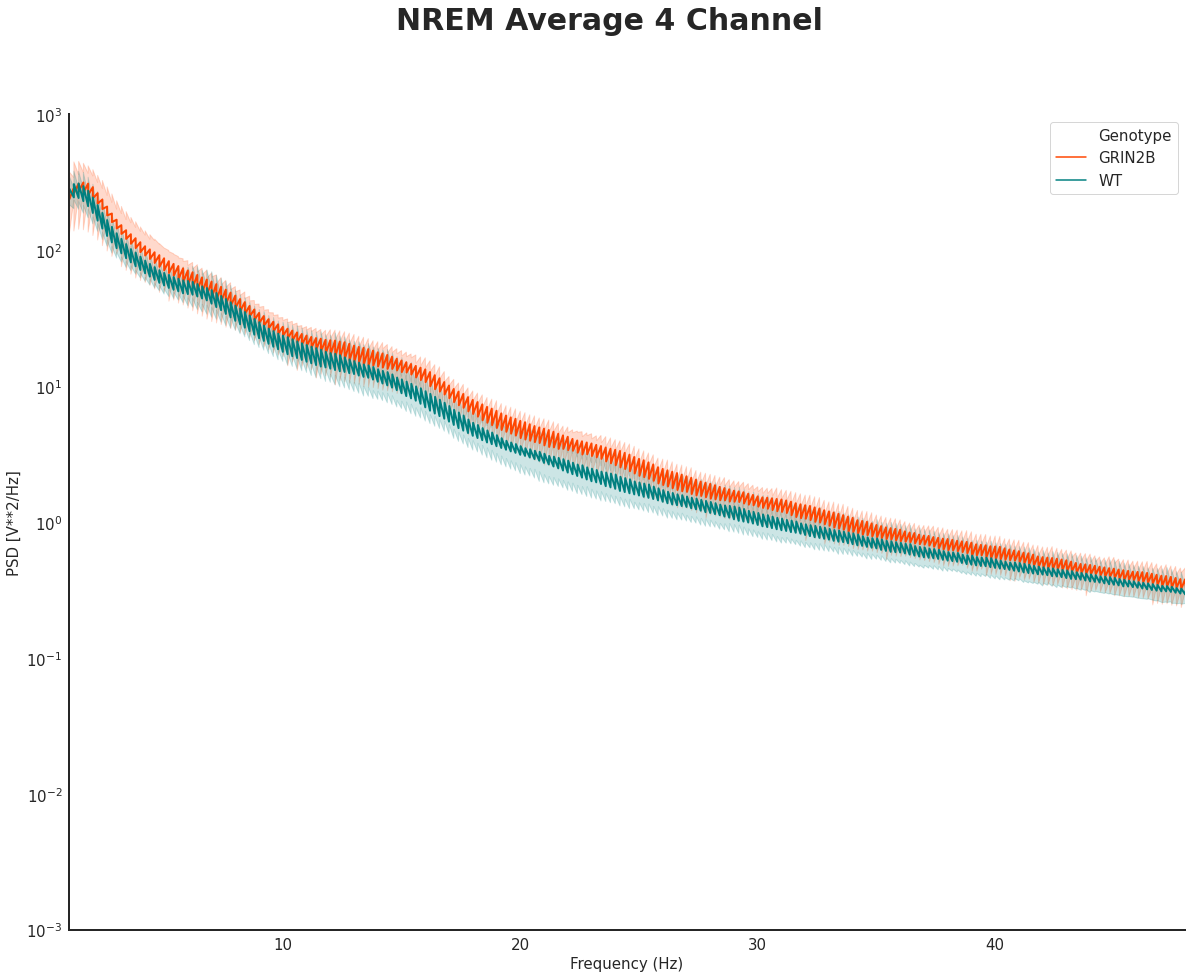

        Unnamed: 0  Animal_ID  Channel         Power   Frequency Genotype
3130             0        138        5  2.387740e+02    0.000000   GRIN2B
3131             1        138        5  9.950081e+02    0.200000   GRIN2B
3132             2        138        5  6.666636e+02    0.400000   GRIN2B
3133             3        138        5  2.271602e+02    0.600000   GRIN2B
3134             4        138        5  1.877303e+02    0.800000   GRIN2B
...            ...        ...      ...           ...         ...      ...
292337         621        131        5  2.256006e-11  124.299281   GRIN2B
292338         622        131        5  2.239217e-11  124.499440   GRIN2B
292339         623        131        5  2.226202e-11  124.699600   GRIN2B
292340         624        131        5  2.216928e-11  124.899760   GRIN2B
292341         625        131        5  2.211372e-11  125.099920   GRIN2B

[23162 rows x 6 columns]


<Figure size 432x288 with 0 Axes>

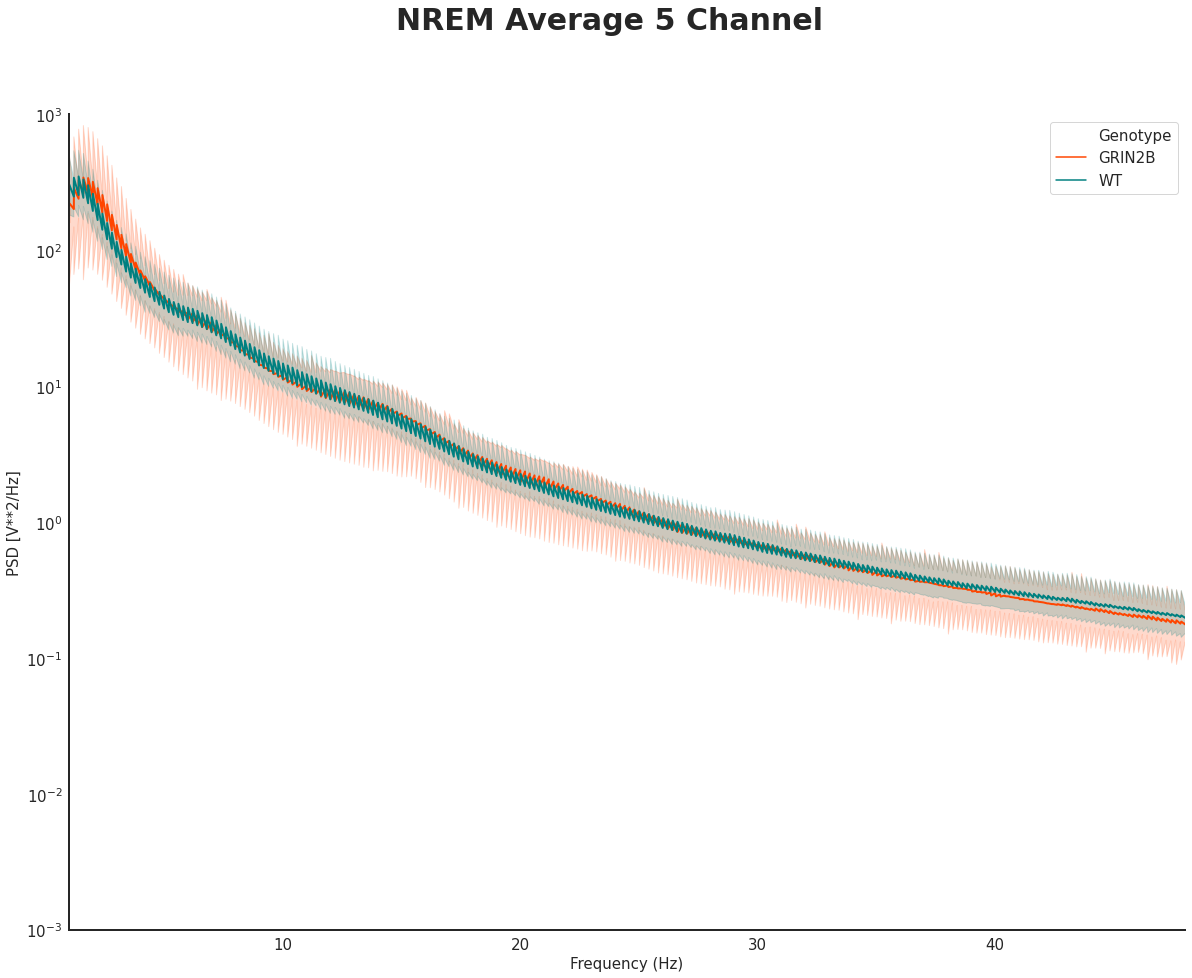

        Unnamed: 0  Animal_ID  Channel         Power   Frequency Genotype
0                0        401        6  4.353620e+01    0.000000       WT
1                1        401        6  2.271053e+02    0.200000       WT
2                2        401        6  2.955317e+02    0.400000       WT
3                3        401        6  2.230290e+02    0.600000       WT
4                4        401        6  1.552054e+02    0.800000       WT
...            ...        ...      ...           ...         ...      ...
263541         621        363        6  1.082947e-11  124.299281       WT
263542         622        363        6  1.071984e-11  124.499440       WT
263543         623        363        6  1.063492e-11  124.699600       WT
263544         624        363        6  1.057448e-11  124.899760       WT
263545         625        363        6  1.053830e-11  125.099920       WT

[23162 rows x 6 columns]


<Figure size 432x288 with 0 Axes>

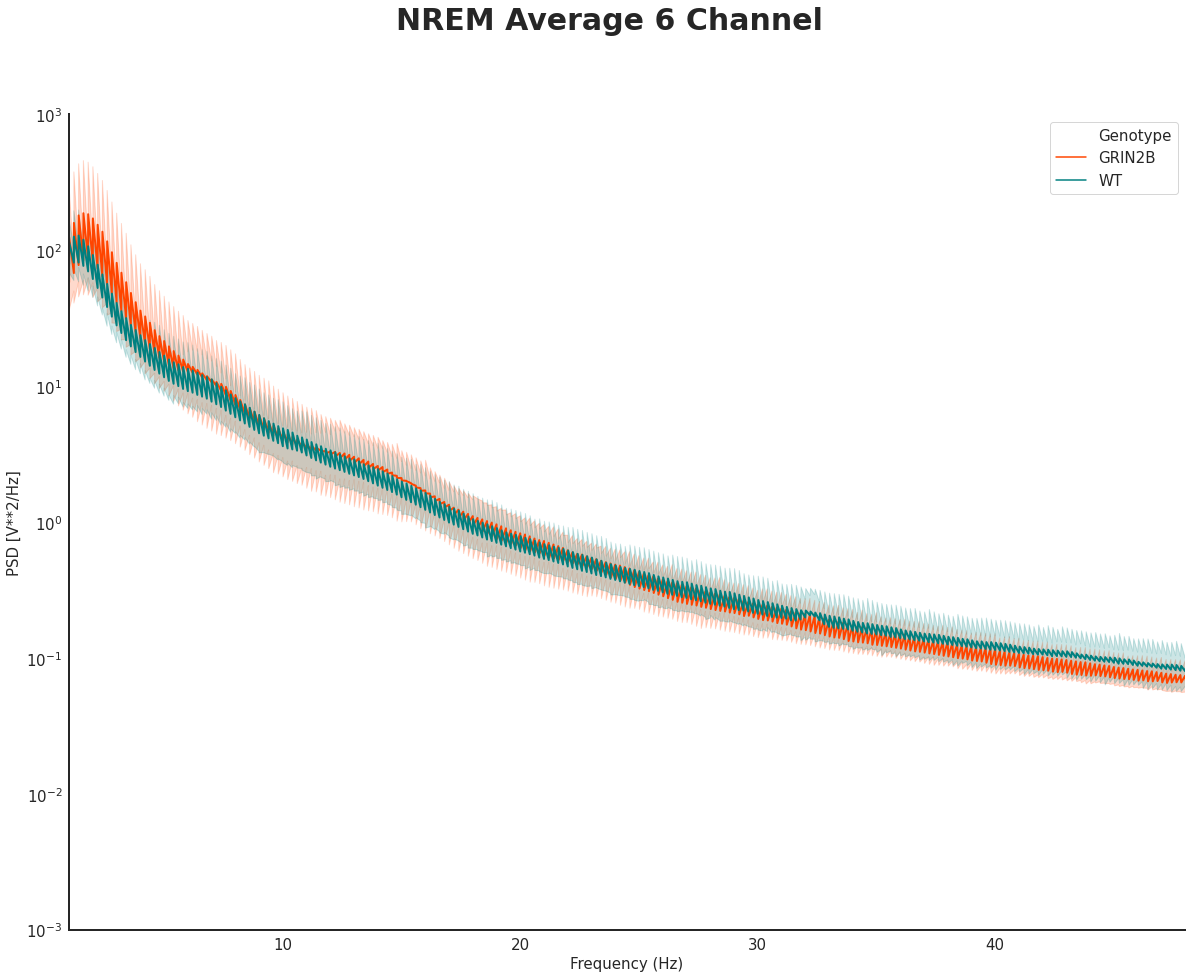

        Unnamed: 0  Animal_ID  Channel         Power   Frequency Genotype
11268            0        364        7  5.147886e+01    0.000000   GRIN2B
11269            1        364        7  1.789627e+02    0.200000   GRIN2B
11270            2        364        7  1.003976e+02    0.400000   GRIN2B
11271            3        364        7  1.130578e+02    0.600000   GRIN2B
11272            4        364        7  1.947358e+02    0.800000   GRIN2B
...            ...        ...      ...           ...         ...      ...
286703         621        131        7  2.261226e-11  124.299281   GRIN2B
286704         622        131        7  2.244407e-11  124.499440   GRIN2B
286705         623        131        7  2.231364e-11  124.699600   GRIN2B
286706         624        131        7  2.222069e-11  124.899760   GRIN2B
286707         625        131        7  2.216502e-11  125.099920   GRIN2B

[23162 rows x 6 columns]


<Figure size 432x288 with 0 Axes>

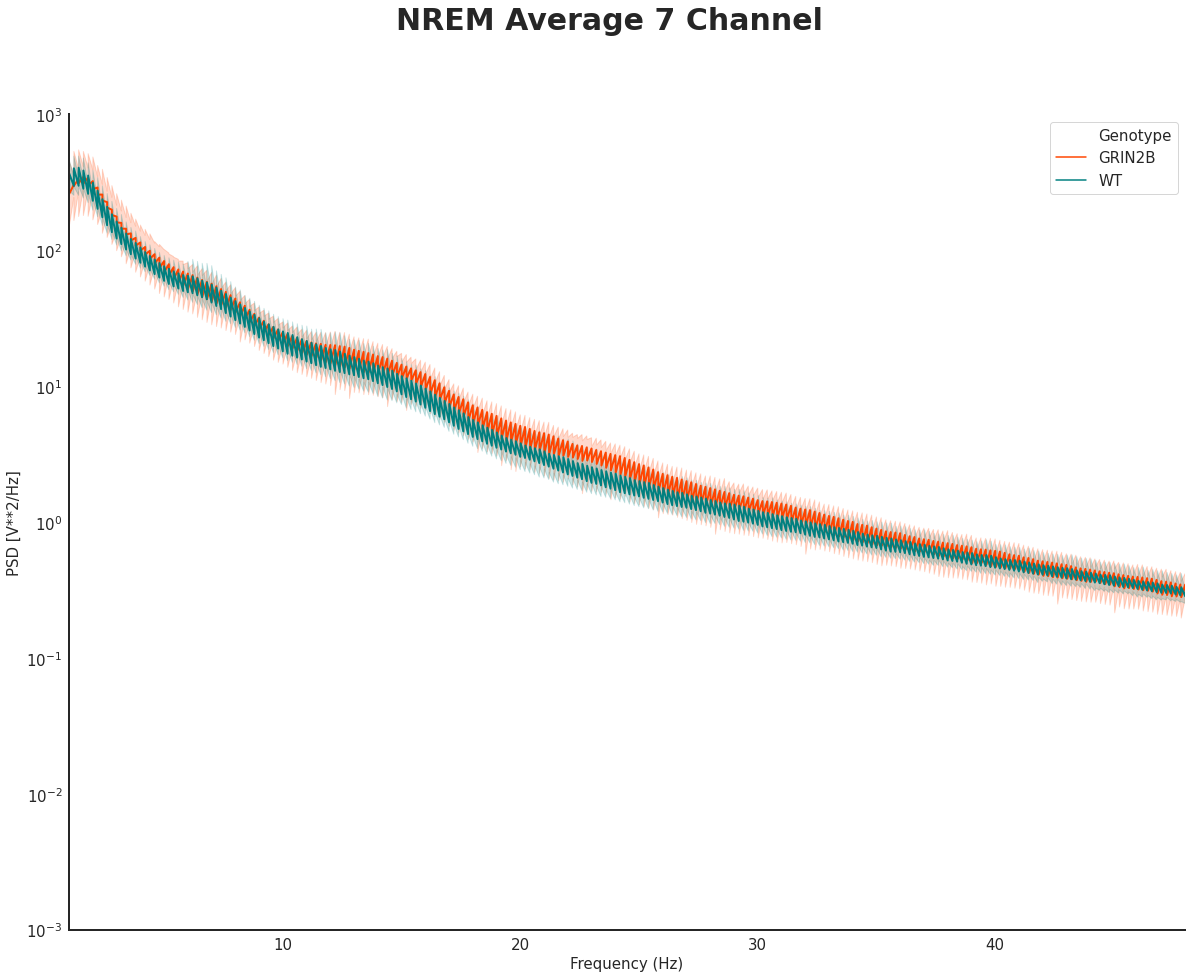

        Unnamed: 0  Animal_ID  Channel         Power  Frequency Genotype
16276            0        404        8  1.836728e+01        0.0       WT
16277            1        404        8  7.136821e+01        0.2       WT
16278            2        404        8  6.056359e+01        0.4       WT
16279            3        404        8  5.123422e+01        0.6       WT
16280            4        404        8  5.367928e+01        0.8       WT
...            ...        ...      ...           ...        ...      ...
294841         621        130        8  1.293777e-12      124.2   GRIN2B
294842         622        130        8  1.285237e-12      124.4   GRIN2B
294843         623        130        8  1.278613e-12      124.6   GRIN2B
294844         624        130        8  1.273894e-12      124.8   GRIN2B
294845         625        130        8  1.271068e-12      125.0   GRIN2B

[23162 rows x 6 columns]


<Figure size 432x288 with 0 Axes>

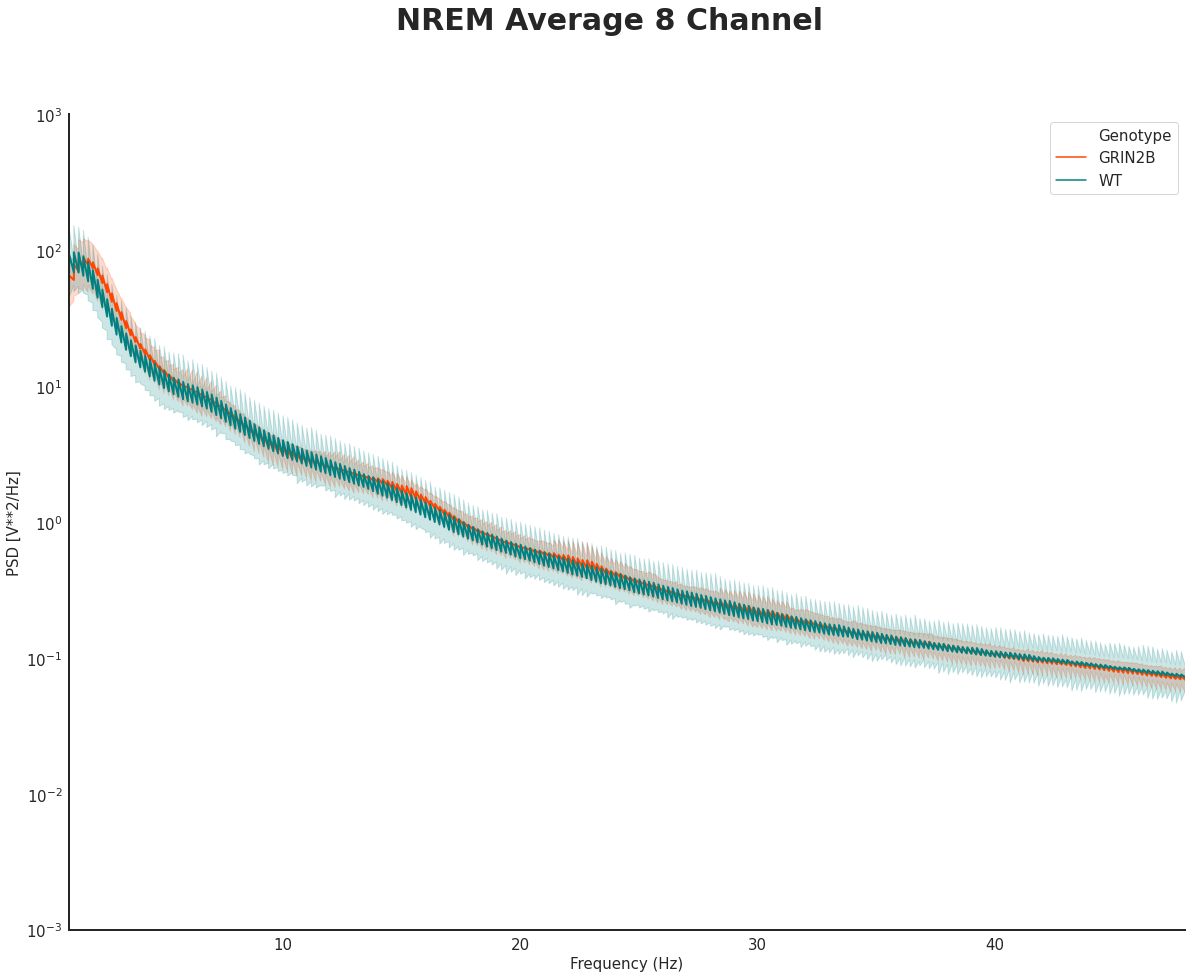

        Unnamed: 0  Animal_ID  Channel         Power   Frequency Genotype
4382             0        367        9  1.396903e+02    0.000000   GRIN2B
4383             1        367        9  4.023663e+02    0.200000   GRIN2B
4384             2        367        9  2.208127e+02    0.400000   GRIN2B
4385             3        367        9  1.658044e+02    0.600000   GRIN2B
4386             4        367        9  2.039441e+02    0.800000   GRIN2B
...            ...        ...      ...           ...         ...      ...
299849         621        366        9  2.788653e-11  124.299281       WT
299850         622        366        9  2.760779e-11  124.499440       WT
299851         623        366        9  2.739205e-11  124.699600       WT
299852         624        366        9  2.723853e-11  124.899760       WT
299853         625        366        9  2.714663e-11  125.099920       WT

[23162 rows x 6 columns]


<Figure size 432x288 with 0 Axes>

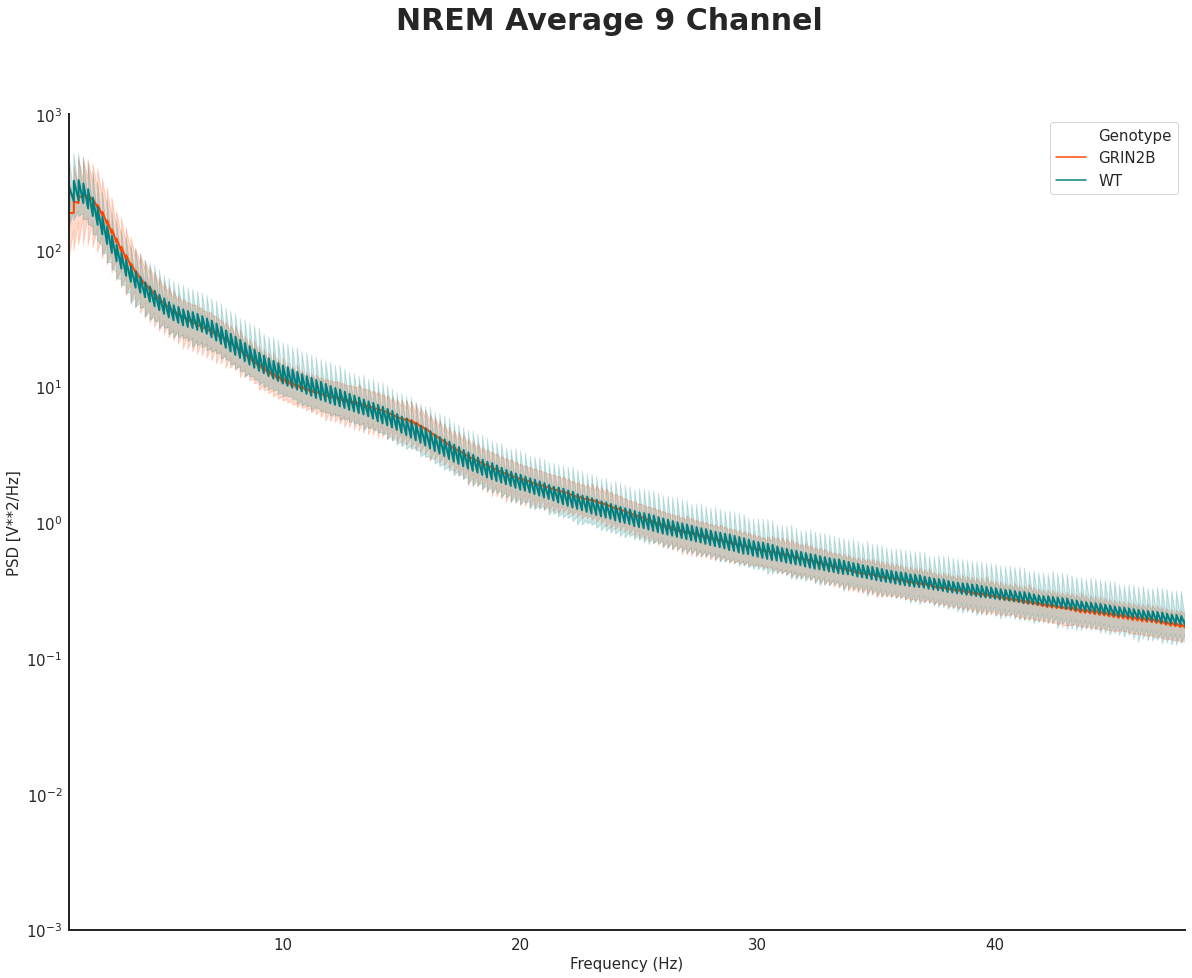

        Unnamed: 0  Animal_ID  Channel         Power  Frequency Genotype
7512             0        382       10  2.842794e+01        0.0       WT
7513             1        382       10  9.941955e+01        0.2       WT
7514             2        382       10  9.914509e+01        0.4       WT
7515             3        382       10  1.481267e+02        0.6       WT
7516             4        382       10  2.113862e+02        0.8       WT
...            ...        ...      ...           ...        ...      ...
297345         621        367       10  5.705756e-11      124.2   GRIN2B
297346         622        367       10  5.649334e-11      124.4   GRIN2B
297347         623        367       10  5.605622e-11      124.6   GRIN2B
297348         624        367       10  5.574502e-11      124.8   GRIN2B
297349         625        367       10  5.555870e-11      125.0   GRIN2B

[23162 rows x 6 columns]


<Figure size 432x288 with 0 Axes>

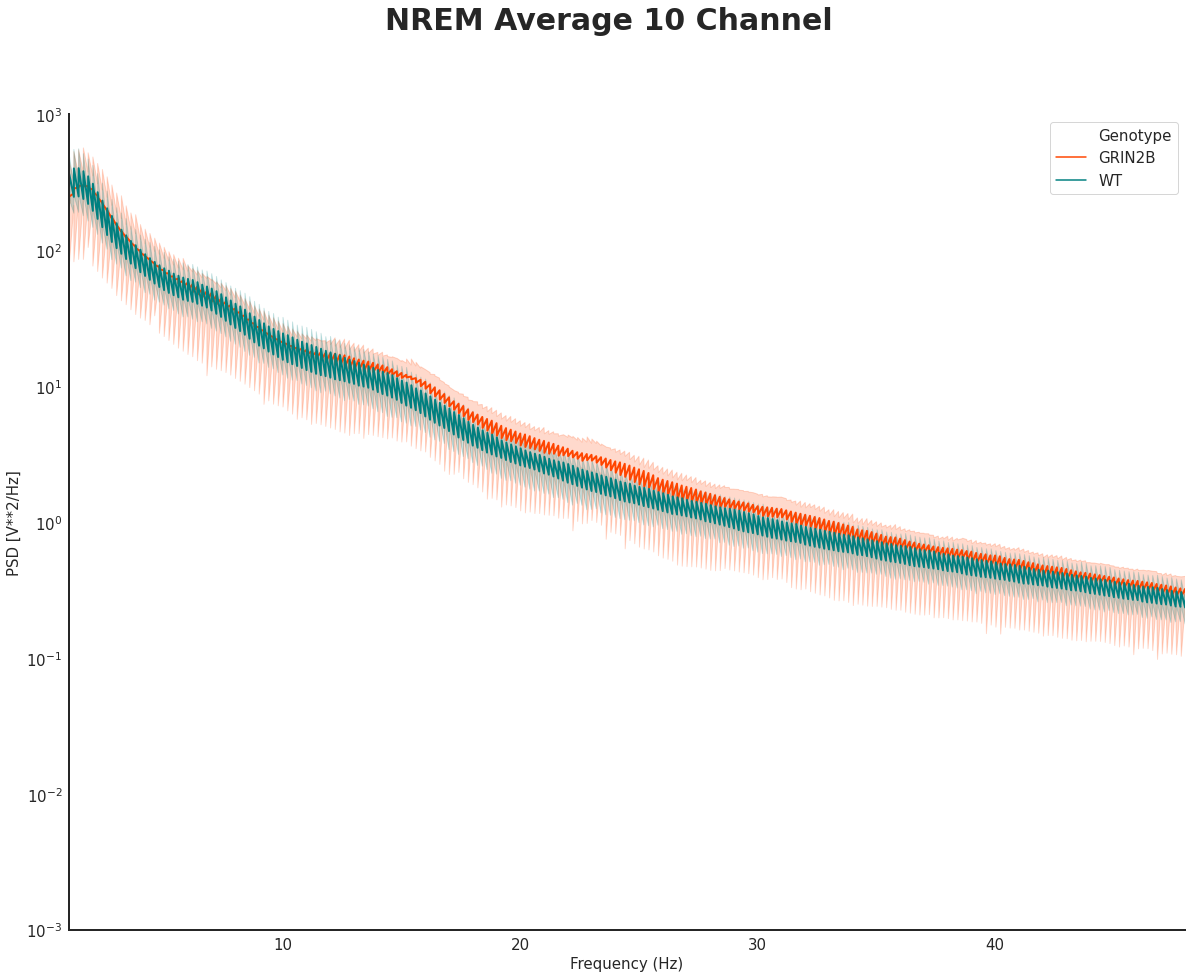

        Unnamed: 0  Animal_ID  Channel         Power   Frequency Genotype
6886             0        139       11  4.547835e+01    0.000000   GRIN2B
6887             1        139       11  1.802609e+02    0.200000   GRIN2B
6888             2        139       11  1.974447e+02    0.400000   GRIN2B
6889             3        139       11  1.942351e+02    0.600000   GRIN2B
6890             4        139       11  2.524548e+02    0.800000   GRIN2B
...            ...        ...      ...           ...         ...      ...
287329         621        402       11  1.699916e-14  124.299281       WT
287330         622        402       11  1.689205e-14  124.499440       WT
287331         623        402       11  1.680906e-14  124.699600       WT
287332         624        402       11  1.674982e-14  124.899760       WT
287333         625        402       11  1.671442e-14  125.099920       WT

[23162 rows x 6 columns]


<Figure size 432x288 with 0 Axes>

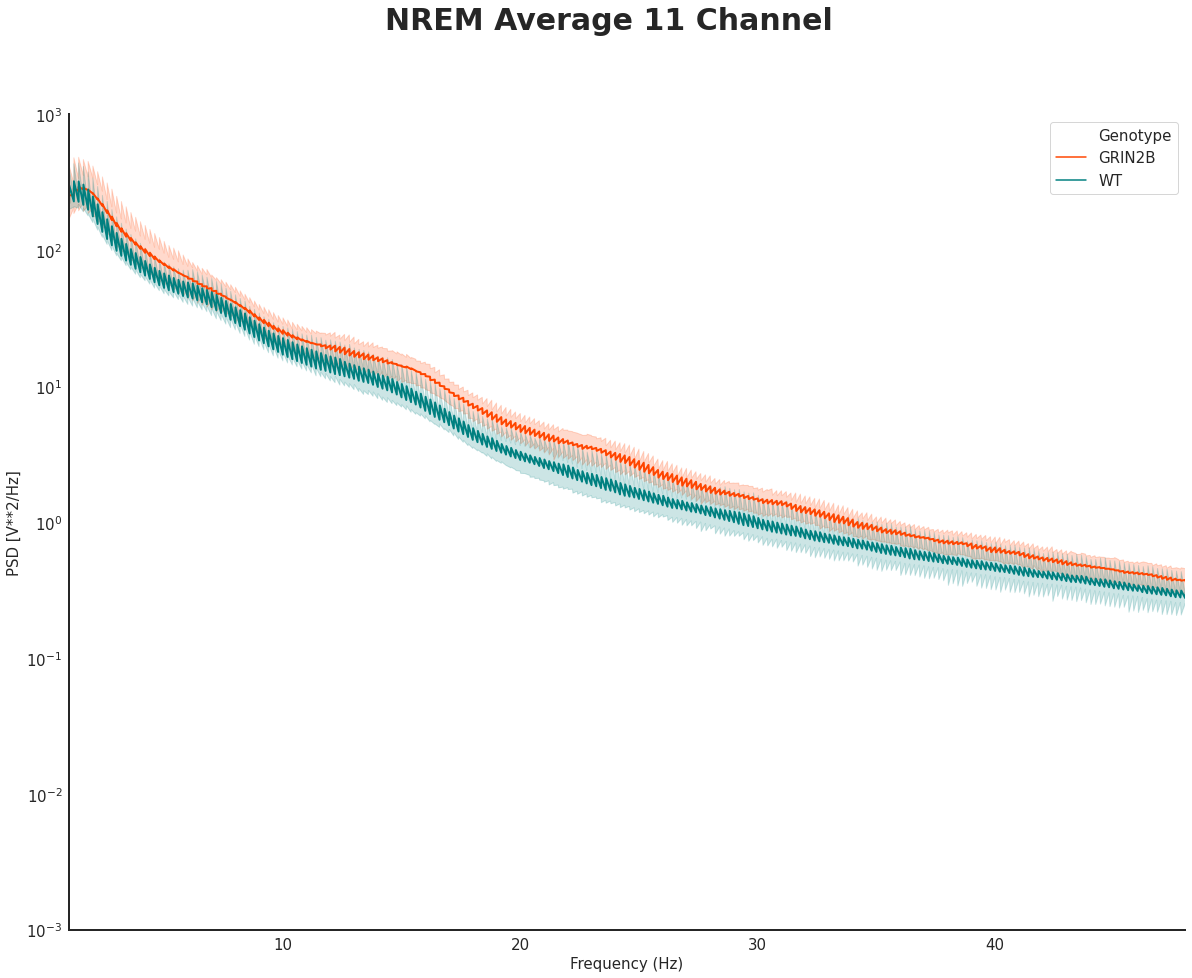

        Unnamed: 0  Animal_ID  Channel         Power   Frequency Genotype
1252             0        237       12  3.765406e+01    0.000000   GRIN2B
1253             1        237       12  1.726631e+02    0.200160   GRIN2B
1254             2        237       12  1.804501e+02    0.400320   GRIN2B
1255             3        237       12  1.482157e+02    0.600480   GRIN2B
1256             4        237       12  1.645408e+02    0.800639   GRIN2B
...            ...        ...      ...           ...         ...      ...
277939         621        137       12  1.065675e-10  124.299281   GRIN2B
277940         622        137       12  1.056540e-10  124.499440   GRIN2B
277941         623        137       12  1.049458e-10  124.699600   GRIN2B
277942         624        137       12  1.044411e-10  124.899760   GRIN2B
277943         625        137       12  1.041388e-10  125.099920   GRIN2B

[23162 rows x 6 columns]


<Figure size 432x288 with 0 Axes>

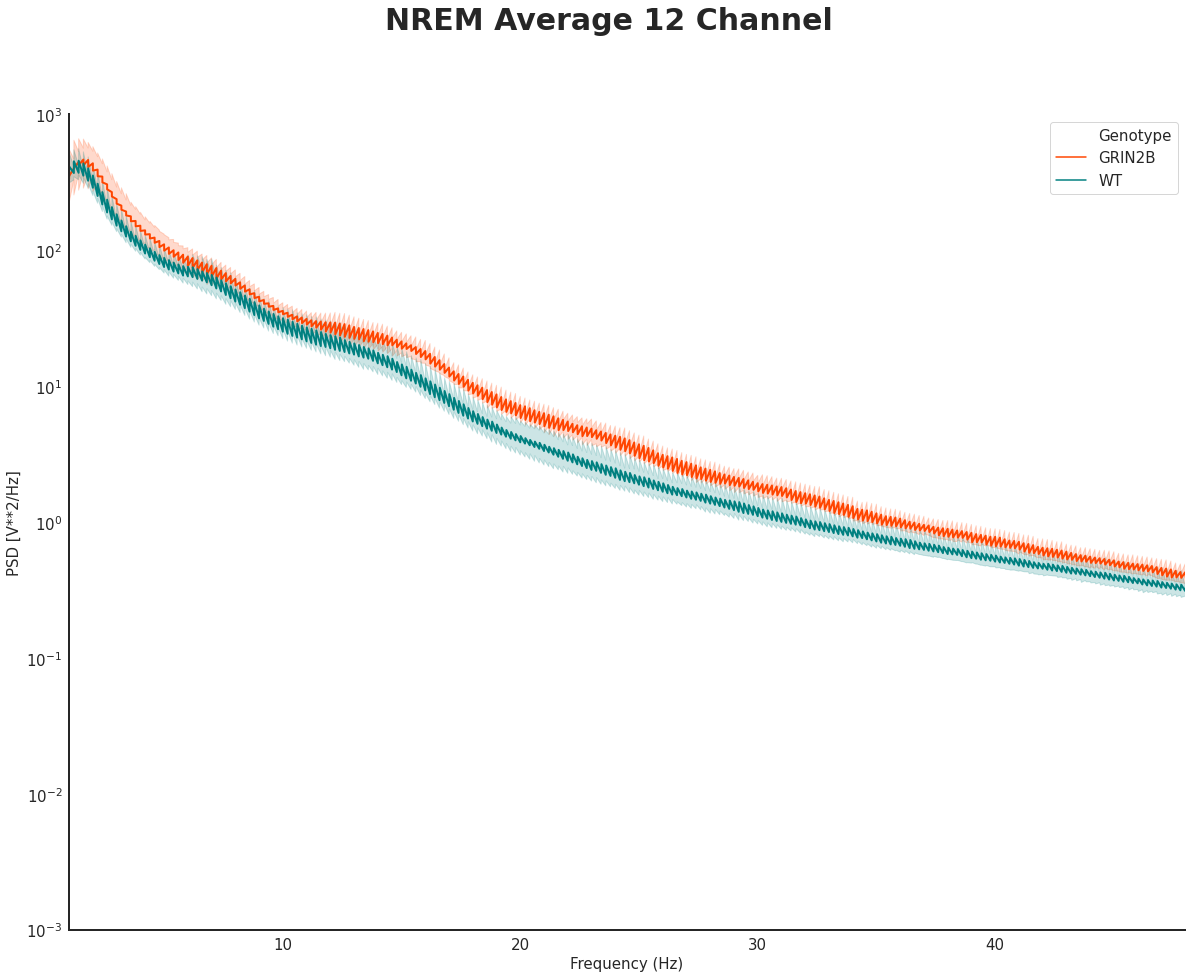

        Unnamed: 0  Animal_ID  Channel         Power  Frequency Genotype
626              0        241       13  8.177209e+01        0.0   GRIN2B
627              1        241       13  3.029580e+02        0.2   GRIN2B
628              2        241       13  2.287730e+02        0.4   GRIN2B
629              3        241       13  1.810018e+02        0.6   GRIN2B
630              4        241       13  1.908628e+02        0.8   GRIN2B
...            ...        ...      ...           ...        ...      ...
291711         621        371       13  2.693520e-11      124.2       WT
291712         622        371       13  2.667015e-11      124.4       WT
291713         623        371       13  2.646499e-11      124.6       WT
291714         624        371       13  2.631897e-11      124.8       WT
291715         625        371       13  2.623158e-11      125.0       WT

[23162 rows x 6 columns]


<Figure size 432x288 with 0 Axes>

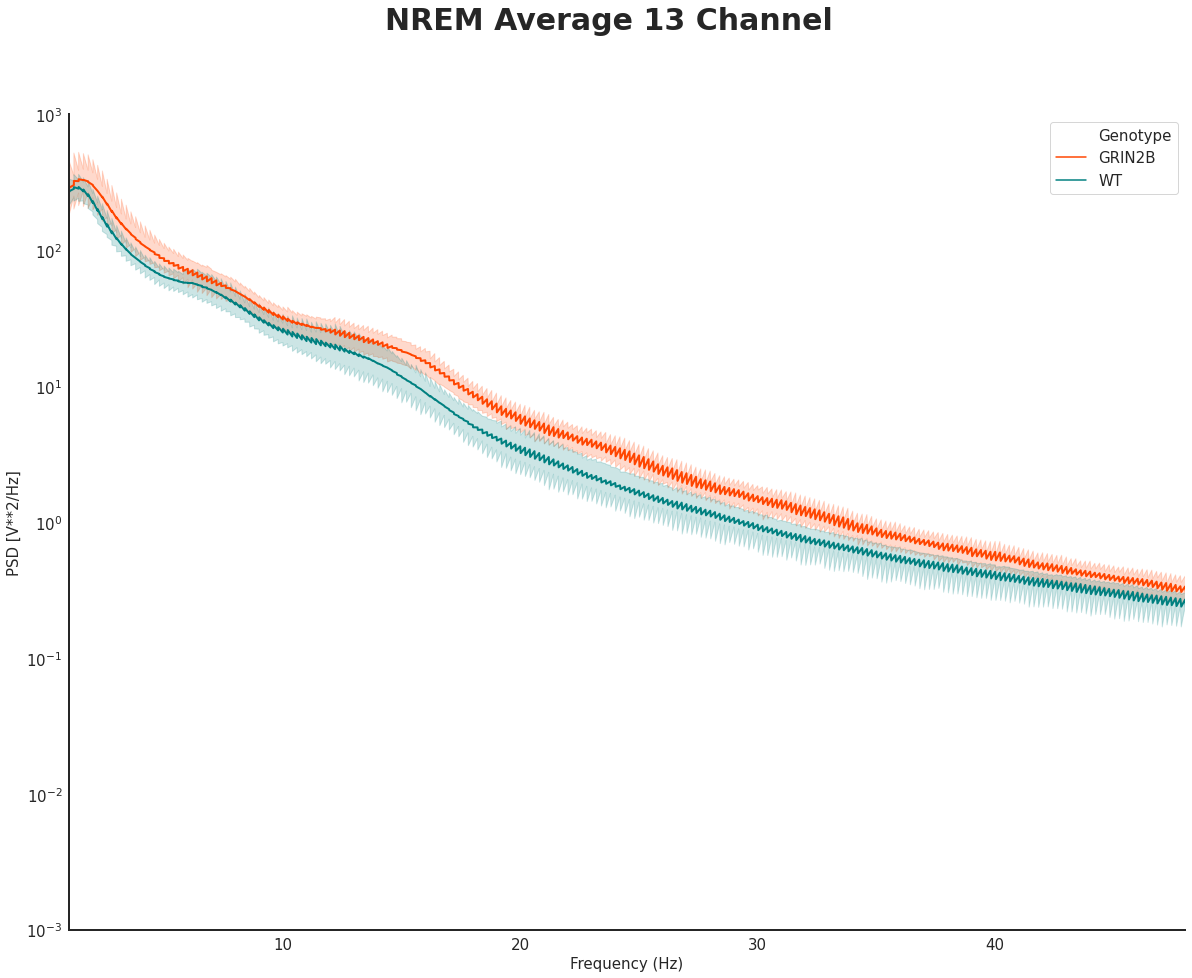

        Unnamed: 0  Animal_ID  Channel         Power  Frequency Genotype
3756             0        367       15  1.800777e+02        0.0   GRIN2B
3757             1        367       15  6.429047e+02        0.2   GRIN2B
3758             2        367       15  5.507110e+02        0.4   GRIN2B
3759             3        367       15  3.569833e+02        0.6   GRIN2B
3760             4        367       15  3.145704e+02        0.8   GRIN2B
...            ...        ...      ...           ...        ...      ...
300475         621        371       15  2.706851e-11      124.2       WT
300476         622        371       15  2.679501e-11      124.4       WT
300477         623        371       15  2.658334e-11      124.6       WT
300478         624        371       15  2.643269e-11      124.8       WT
300479         625        371       15  2.634252e-11      125.0       WT

[23162 rows x 6 columns]


<Figure size 432x288 with 0 Axes>

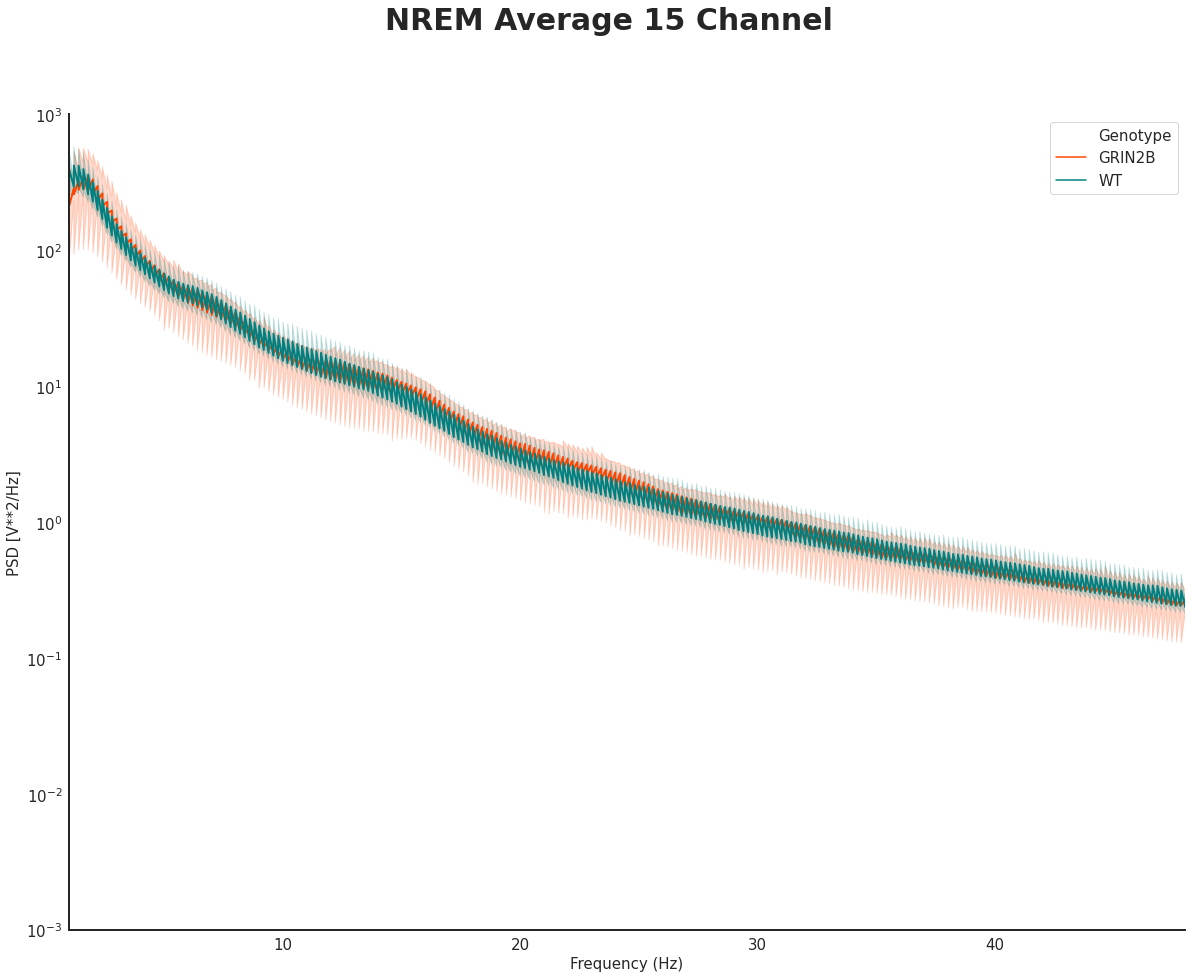

<Figure size 432x288 with 0 Axes>

In [52]:
for channel in channel_list_plot:
    data = nrem[nrem['Channel'] == channel]
    print(data)
    sns.set_style("white") 
    fig, axs = plt.subplots(1,1, figsize=(20,15), sharex = True, sharey=True)
    genotype_palette = ['orangered', 'teal']
    hue_order = ['GRIN2B', 'WT']
    sns.lineplot(data=data, x='Frequency', y='Power', hue='Genotype', hue_order = hue_order, 
             palette = genotype_palette, linewidth = 2)
    plt.suptitle('NREM Average ' + str(channel) + ' Channel', fontsize = 30, fontweight = 'bold') 
    sns.despine()
    plt.yscale('log')
    axs.set_xlim(1, 48)
    axs.set(xlabel = 'Frequency (Hz)')
    axs.set_ylim(10**-3, 10**3)
    axs.set(ylabel = 'PSD [V**2/Hz]')
    for axis in ['bottom','left']:
        axs.spines[axis].set_linewidth(2)
    plt.rcParams.update({'font.size': 15})
    os.chdir('/home/melissa/RESULTS/GRIN2B/Power/NREM/Genotype_Average_Per_Channel/')
    plt.savefig(str(channel) + '_nrem.jpg')
    plt.show()
    plt.clf()

# seizure IDs

In [121]:
os.chdir('/home/melissa/RESULTS/GRIN2B/wake_plots_excluding_seizures')
seizures = pd.read_csv('seizure_GRIN2B_power.csv')
seizures_WT = seizures[seizures['Genotype'] == 'WT']
seizures_het = seizures[seizures['Genotype'] == 'GRIN2B']

In [216]:
save_path = '/home/melissa/RESULTS/GRIN2B/seizures/excluded_animals'